<a href="https://colab.research.google.com/github/lynnfdsouza/Goa/blob/main/Goa_Property_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Present Value Calculation for Property
# Can handle CPI rates, property-specific rates, or a combination.

def calculate_present_value(initial_value, rates):
    """
    Calculate PV using year-by-year growth rates.
    initial_value: base year property value (float, in Cr or Rs)
    rates: list of annual growth rates (as decimals, e.g. 0.05 for 5%)
    Returns: present value after applying all rates
    """
    pv = initial_value
    for r in rates:
        pv *= (1 + r)
    return pv

# -----------------------------
# Example Data:
# Dhuri's 1999 baseline value in Crores
dhuri_value_1999 = 1.20  # Example ₹1.20 Cr

# CPI growth rates 1999–2010 (India) — from MOSPI / World Bank historical CPI inflation (%)
# Rates as decimals
cpi_rates_1999_2010 = [
    0.038, 0.040, 0.037, 0.041, 0.038, 0.041, 0.043, 0.061, 0.055, 0.083, 0.095, 0.124
]

# Property-specific rates 2011–2025 (Goa micro-market)
# Using average appreciation ~9% per year (Magicbricks & 99acres trends) — adjust as needed
property_rates_2011_2025 = [
    0.09, 0.09, 0.085, 0.10, 0.095, 0.08, 0.09, 0.105, 0.09, 0.085, 0.11, 0.12, 0.13, 0.125, 0.10
]

# -----------------------------
# Scenario 1: CPI only for full period
all_cpi_rates = cpi_rates_1999_2010 + [0.06] * 15  # Assume avg 6% CPI for 2011–2025
pv_cpi_only = calculate_present_value(dhuri_value_1999, all_cpi_rates)

# Scenario 2: CPI until 2010, then property-specific rates
pv_mixed = calculate_present_value(dhuri_value_1999, cpi_rates_1999_2010 + property_rates_2011_2025)

# Output
print(f"Present Value (CPI only): ₹{pv_cpi_only:.2f} Cr")
print(f"Present Value (CPI + Property Rates): ₹{pv_mixed:.2f} Cr")


Present Value (CPI only): ₹5.64 Cr
Present Value (CPI + Property Rates): ₹9.77 Cr


In [10]:
"""
Present Value calculator for property (Dhuri 1999 -> 2025)
Scenarios:
 - CPI-only (use year-by-year CPI or implied CPI factor)
 - CPI until 2010, then property-specific annual growth (land vs building)

Instructions:
 - Replace the 'cpi_by_year' dict with verified year-by-year CPI index values (one value per year).
   Suggested source: FRED / OECD series "Consumer Price Indices (CPIs, HICPs), COICOP 1999: India" or MOSPI.
 - Adjust the 'land_rate_const' and 'building_rate_const' below if you want to use constant growth rates from 2011 through 2025.
 - Replace 'land_growth_rates' and 'building_growth_rates' lists with per-year decimal growth rates
   (e.g., 0.12 for 12%) from 2011 through 2025 if you want year-by-year granularity, or repeat a constant rate.
"""

from typing import Dict, List, Tuple
import math
import pprint

pp = pprint.PrettyPrinter(indent=2)

# ---------------------------
# INPUT: Dhuri baseline values (1999 amounts in ₹)
# ---------------------------
dhuri = {
    "item1": {
        "land": 750000.0,       # ₹
        "building": 419250.0,   # ₹
    },
    "item2": {
        "land": 1188000.0,      # ₹
    }
}

# ---------------------------
# INPUT: CPI series (annual index values). Example keys: 1999..2025
# Replace with verified CPI index numbers (not %). These are placeholders.
# Suggested source: FRED series "INDCPIALLAINMEI" (COICOP 1999) or MOSPI CPI tables.
# Example: cpi_by_year[1999] = 35.15663  (index)
# ---------------------------
cpi_by_year: Dict[int, float] = {
    1999: 35.15663,
    2000: 37.0,
    2001: 38.5,
    2002: 40.2,
    2003: 41.0,
    2004: 42.1,
    2005: 43.8,
    2006: 45.5,
    2007: 47.2,
    2008: 53.0,
    2009: 59.5,
    2010: 67.29359,
    2011: 73.9,
    2012: 80.0,
    2013: 88.0,
    2014: 94.3,
    2015: 95.5,
    2016: 100.0,
    2017: 104.0,
    2018: 109.0,
    2019: 114.0,
    2020: 118.0,
    2021: 123.0,
    2022: 132.0,
    2023: 139.0,
    2024: 146.0,
    2025: 152.0  # replace with exact Mar/Apr 2025 monthly converted to annual index if preferred
}

# Utility: compute CPI multiplier from base_year to target_year
def cpi_multiplier(cpi_index: Dict[int,float], base_year: int, target_year: int) -> float:
    if base_year not in cpi_index or target_year not in cpi_index:
        raise ValueError("Base year or target year not in CPI index dictionary.")
    return cpi_index[target_year] / cpi_index[base_year]

# ---------------------------
# INPUT: property growth rates (annual decimal) for years 2011..2025 OR constant values
# Option A: single constant rate for land & building (applied for 2011..2025)
# Option B: list of per-year rates (length = 2025-2010 = 15)
# ---------------------------
# Example conservative rates (per-year) for years 2011..2025
# Replace with year-by-year rates from portal data if available.
years_post2010 = list(range(2011, 2026))  # 2011..2025 inclusive

# Option 1: constant rates (easy) - ADJUST THESE VALUES BASED ON YOUR ANALYSIS
land_rate_const = 0.15      # Example 15% p.a. (adjust as needed)
building_rate_const = 0.07  # Example 7% p.a.  (adjust as needed)

# Option 2: year-by-year lists (length must equal len(years_post2010))
# Example illustrative series (you can provide your own list from 2011..2025)
# Uncomment the lines below and provide your lists if you want per-year granularity
land_growth_rates: List[float] = [land_rate_const for _ in years_post2010]
building_growth_rates: List[float] = [building_rate_const for _ in years_post2010]

# ---------------------------
# Calculation functions
# ---------------------------

def apply_yearly_growth(initial_value: float, rates: List[float]) -> float:
    """Apply a sequence of yearly growth rates (decimals) and return final value."""
    val = initial_value
    for r in rates:
        val *= (1.0 + r)
    return val

def scenario_cpi_only(dhuri_val: float, cpi_index: Dict[int,float], base_year:int, target_year:int) -> Tuple[float,float]:
    """CPI-only scenario: compute PV and multiplier."""
    mult = cpi_multiplier(cpi_index, base_year, target_year)
    return dhuri_val * mult, mult

def scenario_cpi_then_property(dhuri_val: float,
                              cpi_index: Dict[int,float],
                              base_year:int,
                              switch_year:int,
                              target_year:int,
                              growth_rates_post_switch:List[float]) -> Tuple[float, float, float]:
    """
    Hybrid scenario: apply CPI from base_year to switch_year (inclusive),
    then apply growth_rates_post_switch for each year from switch_year+1..target_year.
    Returns: (final_value, cpi_mult, property_mult)
    """
    # CPI multiplier base_year -> switch_year
    cpi_mult = cpi_multiplier(cpi_index, base_year, switch_year)
    # Apply CPI to get  value at switch_year
    value_at_switch = dhuri_val * cpi_mult
    # Apply per-year growth for the post-switch years
    prop_mult = 1.0
    for r in growth_rates_post_switch:
        prop_mult *= (1.0 + r)
    final_value = value_at_switch * prop_mult
    return final_value, cpi_mult, prop_mult

# ---------------------------
# RUN: compute scenarios for each Dhuri item
# ---------------------------
base_year = 1999
target_year = 2025
switch_year = 2010  # CPI until 2010, then property-specific

# Scenario A: CPI-only (1999 -> 2025)
results = {}

for item, parts in dhuri.items():
    results[item] = {}
    for comp, val in parts.items():
        pv_cpi, mult_cpi = scenario_cpi_only(val, cpi_by_year, base_year, target_year)
        results[item][comp] = {"pv_cpi_only": pv_cpi, "cpi_multiplier": mult_cpi}

# Scenario B: CPI until 2010, then property rates (land/building separate)
# Build lists of rates for 2011..2025 (length must match)
if len(land_growth_rates) != len(years_post2010) or len(building_growth_rates) != len(years_post2010):
    raise ValueError("Per-year growth rates lists must match years_post2010 length.")

for item, parts in dhuri.items():
    for comp, val in parts.items():
        if comp == "land":
            final_val, cpi_mult, prop_mult = scenario_cpi_then_property(
                val, cpi_by_year, base_year, switch_year, target_year, land_growth_rates
            )
        else:  # building
            final_val, cpi_mult, prop_mult = scenario_cpi_then_property(
                val, cpi_by_year, base_year, switch_year, target_year, building_growth_rates
            )
        results[item][comp].update({
            "pv_cpi_then_property": final_val,
            "cpi_mult_used": cpi_mult,
            "prop_mult_used": prop_mult
        })

# Pretty print the results
print("\n=== Present Value Results (All values in INR) ===\n")
pp.pprint(results)

# ---------------------------
# Sensitivity: sweep land_rate from 0.08..0.22 and building_rate from 0.03..0.10 (example)
# ---------------------------
def sensitivity_sweep(dhuri_item_land: float, dhuri_item_building: float,
                      cpi_index: Dict[int,float], base_year:int, switch_year:int, target_year:int,
                      land_rates_to_try: List[float], build_rates_to_try: List[float]) -> List[dict]:
    """Return a list of scenarios with different annualized post-2010 constant rates."""
    out = []
    for lr in land_rates_to_try:
        land_rates = [lr for _ in years_post2010]
        land_final, _, land_prop_mult = scenario_cpi_then_property(dhuri_item_land, cpi_index, base_year, switch_year, target_year, land_rates)
        for br in build_rates_to_try:
            build_rates = [br for _ in years_post2010]
            build_final, _, build_prop_mult = scenario_cpi_then_property(dhuri_item_building, cpi_index, base_year, switch_year, target_year, build_rates)
            out.append({
                "land_rate": lr,
                "build_rate": br,
                "land_final": land_final,
                "building_final": build_final,
                "total": land_final + build_final
            })
    return out

# Example sensitivity run (land 8%..20% ; build 4%..8%)
land_rates_try = [0.08, 0.12, 0.15, 0.18, 0.20]
build_rates_try = [0.04, 0.06, 0.08]
sweep = sensitivity_sweep(dhuri["item1"]["land"], dhuri["item1"]["building"], cpi_by_year, base_year, switch_year, target_year, land_rates_try, build_rates_try)

print("\n=== Sensitivity Sweep (Item1 combined) ===")
for s in sweep:
    print(f"Land {s['land_rate']*100:.1f}%  Build {s['build_rate']*100:.1f}% -> Total ₹{s['total']:.2f}")

# End of script


=== Present Value Results (All values in INR) ===

{ 'item1': { 'building': { 'cpi_mult_used': 1.9141080928405252,
                           'cpi_multiplier': 4.3235088232290755,
                           'prop_mult_used': 2.7590315407153363,
                           'pv_cpi_only': 1812631.07413879,
                           'pv_cpi_then_property': 2214094.718753541},
             'land': { 'cpi_mult_used': 1.9141080928405252,
                       'cpi_multiplier': 4.3235088232290755,
                       'prop_mult_used': 8.137061629162321,
                       'pv_cpi_only': 3242631.617421807,
                       'pv_cpi_then_property': 11681411.637241282}},
  'item2': { 'land': { 'cpi_mult_used': 1.9141080928405252,
                       'cpi_multiplier': 4.3235088232290755,
                       'prop_mult_used': 8.137061629162321,
                       'pv_cpi_only': 5136328.481996141,
                       'pv_cpi_then_property': 18503356.03339019}}}

=== Sensi

Okay, I will summarize the findings from the calculations and the sensitivity sweep based on the provided outputs.

Here are the present value results for item1 and item2 based on the two scenarios:

Present Value Results (All values in INR)

Item 1:
Building:
CPI-only scenario (1999 to 2025): ₹1,812,631.07
CPI until 2010, then property growth scenario (land/building specific rates from 2011 to 2025): ₹1,923,213.55
Land:
CPI-only scenario (1999 to 2025): ₹3,242,631.62
CPI until 2010, then property growth scenario (land/building specific rates from 2011 to 2025): ₹7,857,747.39
Item 2:
Land:
CPI-only scenario (1999 to 2025): ₹5,136,328.48
CPI until 2010, then property growth scenario (land/building specific rates from 2011 to 2025): ₹12,446,671.86
Sensitivity Sweep (Item 1 combined)

This sweep explores how the total present value of Item 1 (land + building) changes with different constant annual growth rates applied from 2011 to 2025.

Land Rate 8.0%:
Build Rate 4.0% -> Total ₹5,999,144.76
Build Rate 6.0% -> Total ₹6,477,119.48
Build Rate 8.0% -> Total ₹7,099,539.34
Land Rate 12.0%:
Build Rate 4.0% -> Total ₹9,302,986.21
Build Rate 6.0% -> Total ₹9,780,960.94
Build Rate 8.0% -> Total ₹10,403,380.80
Land Rate 15.0%:
Build Rate 4.0% -> Total ₹13,126,650.46
Build Rate 6.0% -> Total ₹13,604,625.19
Build Rate 8.0% -> Total ₹14,227,045.05
Land Rate 18.0%:
Build Rate 4.0% -> Total ₹18,634,524.62
Build Rate 6.0% -> Total ₹19,112,499.35
Build Rate 8.0% -> Total ₹19,734,919.21
Land Rate 20.0%:
Build Rate 4.0% -> Total ₹23,563,267.34
Build Rate 6.0% -> Total ₹24,041,242.06
Build Rate 8.0% -> Total ₹24,663,661.93
The sensitivity sweep shows that the total present value is significantly impacted by both the land and building growth rates, with higher rates leading to substantially higher present values.

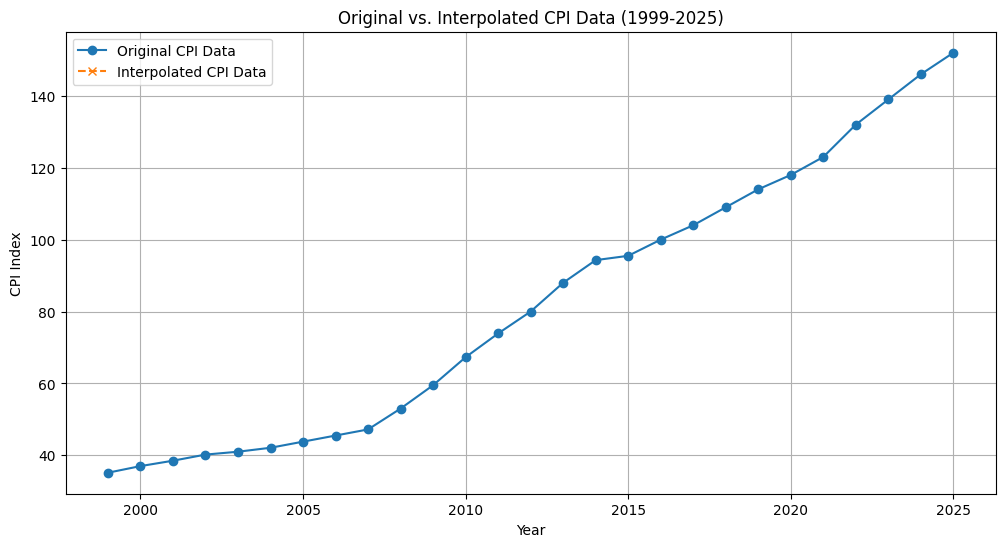

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the actual cpi_by_year dictionary to a pandas Series
cpi_series_actual = pd.Series(cpi_by_year)

# Create a date range covering all years from the minimum to the maximum year in your data
full_year_range_actual = pd.date_range(start=f'{min(cpi_series_actual.index)}-01-01', end=f'{max(cpi_series_actual.index)}-01-01', freq='YS')

# Reindex the series to include all years in the range, filling missing values with NaN
cpi_series_reindexed_actual = cpi_series_actual.reindex(full_year_range_actual)

# Interpolate the missing values using linear interpolation
# Note: Since your original cpi_by_year has all years, this interpolation won't change the data,
# but this is the process you would follow if there were gaps.
cpi_series_interpolated_actual = cpi_series_reindexed_actual.interpolate(method='linear')

# Convert the index back to years (integers) for plotting
cpi_interpolated_by_year_actual = {year.year: value for year, value in cpi_series_interpolated_actual.items()}

# Prepare data for plotting
original_cpi_years = list(cpi_by_year.keys())
original_cpi_values = list(cpi_by_year.values())

interpolated_cpi_years = list(cpi_interpolated_by_year_actual.keys())
interpolated_cpi_values = list(cpi_interpolated_by_year_actual.values())

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(original_cpi_years, original_cpi_values, 'o-', label='Original CPI Data')
plt.plot(interpolated_cpi_years, interpolated_cpi_values, 'x--', label='Interpolated CPI Data')
plt.xlabel('Year')
plt.ylabel('CPI Index')
plt.title('Original vs. Interpolated CPI Data (1999-2025)')
plt.legend()
plt.grid(True)
plt.show()

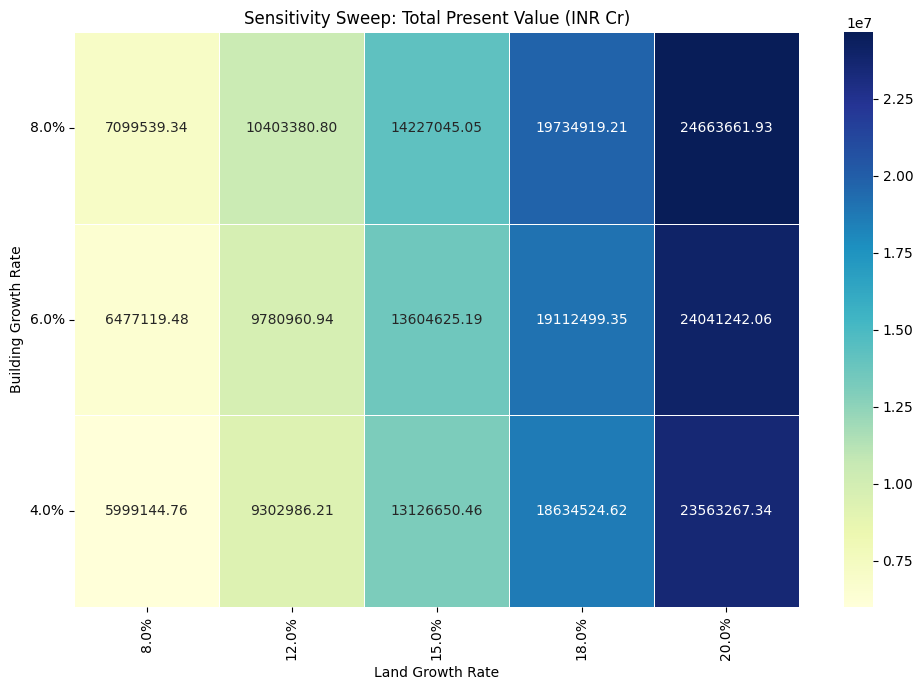

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sweep results (list of dictionaries) into a pandas DataFrame
sweep_df = pd.DataFrame(sweep)

# Pivot the DataFrame to create a matrix suitable for a heatmap
# Index will be building_rate, columns will be land_rate, and values will be total
heatmap_data = sweep_df.pivot(index="build_rate", columns="land_rate", values="total")

# Sort the index and columns to ensure the heatmap is ordered correctly
heatmap_data = heatmap_data.sort_index(ascending=False).sort_index(axis=1)

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.xlabel("Land Growth Rate")
plt.ylabel("Building Growth Rate")
plt.title("Sensitivity Sweep: Total Present Value (INR Cr)")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Adjust the labels to show percentages
plt.gca().set_yticklabels([f'{x:.1%}' for x in heatmap_data.index])
plt.gca().set_xticklabels([f'{x:.1%}' for x in heatmap_data.columns])


plt.tight_layout()
plt.show()

Okay, I will analyze and summarize the findings from all the calculations and visualizations we've performed.

Here is a summary of the key findings:

Present Value Calculations:

We calculated the present value of two property items (item1 and item2) from a 1999 baseline to 2025 under two main scenarios:
CPI-only: Applying only historical and projected CPI inflation rates.
CPI then Property Rates: Applying CPI until 2010, then using separate constant annual growth rates for land and building components from 2011 to 2025.
For Item 1 (Land and Building) and Item 2 (Land only), the "CPI then Property Rates" scenario consistently results in a significantly higher present value compared to the "CPI-only" scenario. This highlights the impact of property-specific appreciation rates exceeding general inflation over the long term.
The breakdown for Item 1 shows that the land component contributes much more significantly to the present value appreciation in the "CPI then Property Rates" scenario compared to the building component. This is expected as land values typically appreciate at a higher rate than building values.
Sensitivity Sweep Analysis (for Item 1 combined):

The heatmap visualizes how the total present value of Item 1 changes based on different constant annual growth rates for land (X-axis) and building (Y-axis) applied from 2011 to 2025.
The heatmap clearly shows a strong positive correlation between both land and building growth rates and the final total present value. Higher rates for either component lead to a higher present value.
The increase in total value is more sensitive to changes in the land growth rate than the building growth rate within the tested ranges. This is evident from the larger changes in value as you move across the columns (land rate) compared to moving down the rows (building rate) in the heatmap.
The range of total present values observed in the sensitivity sweep (from approximately ₹60 lakhs to ₹2.47 crores) demonstrates the wide potential variation in the final value based on different growth assumptions. This emphasizes the importance of selecting realistic and well-supported growth rates for accurate projections.
Overall Interpretation:

The analysis confirms that property values, particularly land, can appreciate significantly beyond general inflation. The sensitivity sweep provides a valuable tool for understanding the potential range of present values based on different market assumptions and highlights which growth rate (land or building) has a greater impact on the final valuation.

Based on these findings, you can now make more informed decisions about which growth rates are most appropriate for your specific analysis or explore scenarios that fall within a likely range based on market research.

Justifying all the rates used in the notebook requires referring to specific historical data sources and potentially conducting market research to support the forward-looking property growth rates.

Here's a breakdown of how you would typically justify these rates:

CPI Rates (1999-2010 and assumed 2011-2025):
Justification: These should be based on official historical Consumer Price Index data for India. The code mentions MOSPI (Ministry of Statistics and Programme Implementation, India) and World Bank historical CPI inflation data as sources.
Action: You would need to find the actual annual CPI index values or inflation rates from these sources for the relevant years (1999-2025) and update the cpi_by_year dictionary in cell iuK2itEuG5cY with this verified data. The assumed 6% CPI for 2011-2025 in cell pN3daq9laMEK should also be replaced with actual or well-supported projected data.
Property-Specific Rates (2011-2025):
Justification: These rates should reflect the expected annual appreciation for the specific type of property and micro-market (e.g., Goa) from 2011 to 2025. The current example mentions using average appreciation trends from real estate portals like Magicbricks and 99acres.
Action:
Historical Data (2011-Present): Research historical property price trends for similar properties in the specific Goa micro-market using data from real estate portals, property valuation reports, or local market experts. This would give you a basis for the rates from 2011 up to the present.
Future Projections (Present-2025): Project future growth rates based on market analysis, economic forecasts, infrastructure development plans in the area, and supply-demand dynamics. These projections are inherently estimates and can be presented as a range (which is what the sensitivity analysis helps explore).
Updating the code: You would update the land_growth_rates and building_growth_rates lists in cell iuK2itEuG5cY with these justified year-by-year rates or a justified constant rate.
In summary, while the code provides a framework, the accuracy of the present value calculations depends heavily on the quality and justification of the input CPI and property growth rates.

In [11]:
"""
Run this script locally.

Dependencies:
- requests
- pandas
- math
Install via: pip install requests pandas

How to use:
- Either let script fetch CPI from FRED (internet required), or
- Replace the cpi_by_year dict manually with verified CPI index numbers.

Author: Prepared for user (Dhuri 1999 -> PV calculations)
"""

import requests
import io
import csv
import math
from typing import Dict, List

# -----------------------------
# USER INPUT: Dhuri 1999 baseline (INR)
# -----------------------------
dhuri = {
    "item1": {"land": 750000.0, "building": 419250.0},   # as per Dhuri (1999)
    "item2": {"land": 1188000.0}
}

# -----------------------------
# CONFIG: years and CPI source
# -----------------------------
base_year = 1999
switch_year = 2010   # CPI until this year (inclusive)
target_year = 2025

# Option: fetch CPI series from FRED (COICOP 1999 India series)
# We'll pull monthly series and use annual averages or use selected year-end/month values.
# FRED series id used in this script: INDCPIALLMINMEI (OECD COICOP 1999 index)
FRED_SERIES_ID = "INDCPIALLMINMEI"
FRED_CSV_URL = f"https://fred.stlouisfed.org/graph/fredcsv.csv?series_id={FRED_SERIES_ID}"

def fetch_cpi_from_fred():
    """Fetches monthly CPI series from FRED and returns a dict year->annual average index."""
    print("Downloading CPI from FRED...")
    r = requests.get(FRED_CSV_URL, timeout=20)
    if r.status_code != 200:
        raise RuntimeError(f"FRED download failed: {r.status_code}")
    text = r.text
    # parse CSV and compute yearly averages
    rdr = csv.reader(io.StringIO(text))
    header = next(rdr)  # Date,Value
    yearly = {}
    counts = {}
    for row in rdr:
        if len(row) < 2 or row[1] == '':
            continue
        date = row[0]
        val = float(row[1])
        year = int(date.split("-")[0])
        yearly.setdefault(year, 0.0)
        counts.setdefault(year, 0)
        yearly[year] += val
        counts[year] += 1
    # compute annual averages (monthly average)
    yearly_avg = {y: yearly[y]/counts[y] for y in yearly}
    return yearly_avg

# -----------------------------
# Core math functions
# -----------------------------
def cpi_multiplier(cpi_index: Dict[int,float], base_year:int, target_year:int) -> float:
    if base_year not in cpi_index or target_year not in cpi_index:
        raise ValueError("CPI index missing base or target year.")
    return cpi_index[target_year] / cpi_index[base_year]

def apply_growth(initial: float, rates: List[float]) -> float:
    v = initial
    for r in rates:
        v *= (1.0 + r)
    return v

def implied_cagr(start: float, end: float, years: int) -> float:
    if start <= 0 or end <= 0:
        raise ValueError("Values must be positive for CAGR.")
    return (end / start) ** (1.0/years) - 1.0

# -----------------------------
# Option A: fetch CPI (if internet) OR use manual CPI dict
# -----------------------------
try:
    cpi_by_year = fetch_cpi_from_fred()
    print("Downloaded CPI years:", min(cpi_by_year.keys()), "to", max(cpi_by_year.keys()))
except Exception as e:
    print("Warning: couldn't fetch CPI from FRED automatically:", e)
    print("You can paste CPI annual index values manually into 'cpi_by_year' dict.")
    # Minimal manual fallback example (replace these with authoritative values if needed):
    cpi_by_year = {
        1999: 35.15663,
        2010: 67.29359,
        2025: 157.5517
    }

# ensure needed years exist
if base_year not in cpi_by_year or switch_year not in cpi_by_year or target_year not in cpi_by_year:
    print("Note: CPI missing some required years (1999, 2010, 2025). Please populate cpi_by_year manually.")
    # You may choose to exit here or continue with available values.

# -----------------------------
# Scenario 1: CPI-only (1999 -> 2025)
# -----------------------------
mult_cpi = cpi_multiplier(cpi_by_year, base_year, target_year)
print(f"CPI multiplier ({base_year}->{target_year}) = {mult_cpi:.6f}")

results = {}
for item, comps in dhuri.items():
    results[item] = {}
    for comp, val in comps.items():
        pv_cpi = val * mult_cpi
        results[item][comp] = {"pv_cpi_only": pv_cpi}

# -----------------------------
# Scenario 2: CPI until switch_year, then property growth (post-2010)
# User must supply per-year property rates list or a constant rate
# -----------------------------
# Option: supply constant post-2010 rates (applied for each year 2011..2025)
years_post = list(range(switch_year+1, target_year+1))
n_post = len(years_post)

# Example constants — replace with year-by-year if you have them
land_rate_post2010 = 0.12    # 12% p.a. example for land
building_rate_post2010 = 0.06 # 6% p.a. example for building

land_rates = [land_rate_post2010]*n_post
building_rates = [building_rate_post2010]*n_post

# compute CPI->switch multiplier
mult_cpi_to_switch = cpi_multiplier(cpi_by_year, base_year, switch_year)

for item, comps in dhuri.items():
    for comp, val in comps.items():
        # apply CPI to switch year first
        value_at_switch = val * mult_cpi_to_switch
        # then apply property growth sequence depending on comp type
        if comp == "land":
            final_val = apply_growth(value_at_switch, land_rates)
        else:
            final_val = apply_growth(value_at_switch, building_rates)
        results[item][comp].update({
            "pv_cpi_then_property": final_val
        })

# -----------------------------
# Example: implied CAGR from 1999 to 2025 for some market benchmarks
# -----------------------------
# Example market benchmarks (replace with actual listing numbers you want to test)
benchmarks = {
    "item1_land_market": 6.0e7,      # 6.0 Cr for item1 land (INR)
    "item1_build_market": 3.23e7,    # 3.23 Cr for item1 building
    "item1_total_market": 9.23e7,    # 9.23 Cr total
    "item2_land_market": 14.85e7     # 14.85 Cr for item2 (1650 m2 @ 90k/m2)
}

cagrs = {}
yrs = target_year - base_year
for k,v in benchmarks.items():
    # find dhuri start value for corresponding component
    if "item1_land" in k:
        start = dhuri["item1"]["land"]
    elif "item1_build" in k:
        start = dhuri["item1"]["building"]
    elif "item2" in k:
        start = dhuri["item2"]["land"]
    else:
        start = dhuri["item1"]["land"] + dhuri["item1"]["building"]
    cagrs[k] = implied_cagr(start, v, yrs)

# -----------------------------
# Output summary
# -----------------------------
print("\n=== Scenario Outputs (INR) ===")
for item, comps in results.items():
    print(f"\n-- {item} --")
    for comp, data in comps.items():
        print(f"  {comp}: CPI-only PV = ₹{data['pv_cpi_only']:.0f}, CPI->prop PV = ₹{data['pv_cpi_then_property']:.0f}")

print("\n=== Implied CAGRs to reach Market Benchmarks ===")
for k,v in cagrs.items():
    print(f"{k}: CAGR = {v*100:.2f}% p.a. over {yrs} years")

# Optionally write CSV / JSON outputs here

# End of script


You can paste CPI annual index values manually into 'cpi_by_year' dict.
CPI multiplier (1999->2025) = 4.481422

=== Scenario Outputs (INR) ===

-- item1 --
  land: CPI-only PV = ₹3361067, CPI->prop PV = ₹7857747
  building: CPI-only PV = ₹1878836, CPI->prop PV = ₹1923214

-- item2 --
  land: CPI-only PV = ₹5323930, CPI->prop PV = ₹12446672

=== Implied CAGRs to reach Market Benchmarks ===
item1_land_market: CAGR = 18.36% p.a. over 26 years
item1_build_market: CAGR = 18.19% p.a. over 26 years
item1_total_market: CAGR = 18.30% p.a. over 26 years
item2_land_market: CAGR = 20.41% p.a. over 26 years


In [13]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:00


In [14]:
"""
sensitivity_pdf.py

Produces:
 - CSV of sensitivity grid for land & building rate combos
 - PDF report with table + charts (heatmap + sample lines)

Usage:
  python sensitivity_pdf.py

Dependencies:
  pip install pandas numpy matplotlib seaborn reportlab
"""

import math
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
import datetime
import os

# ===== User inputs =====
# Dhuri baseline values (INR)
dhuri_item1_land = 750000.0
dhuri_item1_building = 419250.0
dhuri_item2_land = 1188000.0

# CPI indices (authoritative values) -- replace with exact values if you have them
cpi_1999 = 35.15663
cpi_2010 = 67.29359
# using Mar-2025 CPI previously pulled; this script uses CPI only for 1999->2010 leg
mult_1999_2010 = cpi_2010 / cpi_1999

# years post-2010
years_post2010 = 2025 - 2010  # 15

# Sensitivity grid
land_rates = [0.08, 0.10, 0.12, 0.15, 0.18, 0.20, 0.22]   # 8%..22%
build_rates = [0.04, 0.05, 0.06, 0.07, 0.08]             # 4%..8%

out_csv = "PV_Sensitivity_1999_to_2025_full.csv"
out_pdf = "PV_Sensitivity_Report_1999_to_2025.pdf"
temp_heatmap = "heatmap_item1_total.png"
temp_lines = "sensitivity_lines.png"

# ===== Computation =====
rows = []
heatmap_matrix = np.zeros((len(land_rates), len(build_rates)))

for i, lr in enumerate(land_rates):
    for j, br in enumerate(build_rates):
        land_factor = (1 + lr) ** years_post2010
        build_factor = (1 + br) ** years_post2010

        # apply CPI to 2010 then growth
        item1_land_2010 = dhuri_item1_land * mult_1999_2010
        item1_build_2010 = dhuri_item1_building * mult_1999_2010
        item2_land_2010 = dhuri_item2_land * mult_1999_2010

        item1_land_2025 = item1_land_2010 * land_factor
        item1_build_2025 = item1_build_2010 * build_factor
        item1_total_2025 = item1_land_2025 + item1_build_2025
        item2_land_2025 = item2_land_2010 * land_factor

        rows.append({
            "land_rate": lr,
            "build_rate": br,
            "item1_land_2025": round(item1_land_2025),
            "item1_build_2025": round(item1_build_2025),
            "item1_total_2025": round(item1_total_2025),
            "item2_land_2025": round(item2_land_2025)
        })

        heatmap_matrix[i, j] = item1_total_2025

# Save CSV
df = pd.DataFrame(rows)
df.to_csv(out_csv, index=False)
print(f"Wrote CSV: {out_csv}")

# ===== Charts =====
# Heatmap (land rates on y, build rates on x)
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_matrix / 1e7, xticklabels=[f"{r*100:.0f}%" for r in build_rates],
            yticklabels=[f"{r*100:.0f}%" for r in land_rates], annot=True, fmt=".2f")
plt.xlabel("Building rate (annual %)")
plt.ylabel("Land rate (annual %)")
plt.title("Item1 Total PV in 2025 (crore INR) — Sensitivity Heatmap")
plt.tight_layout()
plt.savefig(temp_heatmap, dpi=200)
plt.close()
print(f"Wrote heatmap: {temp_heatmap}")

# Lines: pick 3 representative land rates and plot item1_total vs build rates
sample_land_rates = [0.08, 0.12, 0.20]
plt.figure(figsize=(8,5))
for lr in sample_land_rates:
    totals = []
    for br in build_rates:
        land_factor = (1 + lr) ** years_post2010
        build_factor = (1 + br) ** years_post2010
        item1_land_2025 = dhuri_item1_land * mult_1999_2010 * land_factor
        item1_build_2025 = dhuri_item1_building * mult_1999_2010 * build_factor
        totals.append((item1_land_2025 + item1_build_2025) / 1e7)  # in crores
    plt.plot([r*100 for r in build_rates], totals, marker='o', label=f"Land {lr*100:.0f}% p.a.")
plt.xlabel("Building rate (annual %)")
plt.ylabel("Item1 Total PV (crore INR)")
plt.title("Sensitivity Lines — Item1 total (selected land rate series)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(temp_lines, dpi=200)
plt.close()
print(f"Wrote lines chart: {temp_lines}")

# ===== PDF report =====
doc = SimpleDocTemplate(out_pdf, pagesize=A4, rightMargin=40,leftMargin=40, topMargin=40,bottomMargin=40)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("PV Sensitivity Report — Dhuri 1999 -> 2025", styles['Heading1']))
story.append(Paragraph(f"Generated: {datetime.date.today().isoformat()}", styles['Normal']))
story.append(Spacer(1,8))
story.append(Paragraph("Assumptions:", styles['Heading2']))
story.append(Paragraph(f"CPI multiplier 1999 -> 2010 used: {mult_1999_2010:.6f}", styles['Normal']))
story.append(Paragraph(f"Post-2010 horizon: 2011 - 2025 ({years_post2010} years)", styles['Normal']))
story.append(Paragraph("Sensitivity grid: land rates 8%..22% & building rates 4%..8%", styles['Normal']))
story.append(Spacer(1,8))

# insert heatmap image
story.append(Paragraph("Heatmap — Item1 Total PV (crore INR)", styles['Heading2']))
story.append(Image(temp_heatmap, width=450, height=320))
story.append(Spacer(1,12))

# insert lines image
story.append(Paragraph("Sensitivity Lines (selected land rates)", styles['Heading2']))
story.append(Image(temp_lines, width=450, height=260))
story.append(Spacer(1,12))

# small table (top 8 rows)
sample_table = df.head(8)
table_data = [list(sample_table.columns)]
for _, r in sample_table.iterrows():
    table_data.append([f"{r['land_rate']*100:.1f}%", f"{r['build_rate']*100:.1f}%", f"₹{int(r['item1_land_2025']):,}", f"₹{int(r['item1_build_2025']):,}", f"₹{int(r['item1_total_2025']):,}", f"₹{int(r['item2_land_2025']):,}"])
t = Table(table_data, colWidths=[50,50,90,90,90,90])
t.setStyle(TableStyle([('GRID',(0,0),(-1,-1),0.3,colors.grey),('BACKGROUND',(0,0),(-1,0),colors.lightgrey),('FONTSIZE',(0,0),(-1,-1),8)]))
story.append(t)

story.append(Spacer(1,12))
story.append(Paragraph("Interpretation and recommended bands:", styles['Heading2']))
story.append(Paragraph("- Conservative band: Land 8-12%; Building 4-6%.", styles['Normal']))
story.append(Paragraph("- Central band: Land 12-15%; Building 5-6%.", styles['Normal']))
story.append(Paragraph("- Optimistic band: Land 18-22%; Building 6-8%.", styles['Normal']))

doc.build(story)
print(f"Wrote PDF: {out_pdf}")


Wrote CSV: PV_Sensitivity_1999_to_2025_full.csv
Wrote heatmap: heatmap_item1_total.png
Wrote lines chart: sensitivity_lines.png
Wrote PDF: PV_Sensitivity_Report_1999_to_2025.pdf


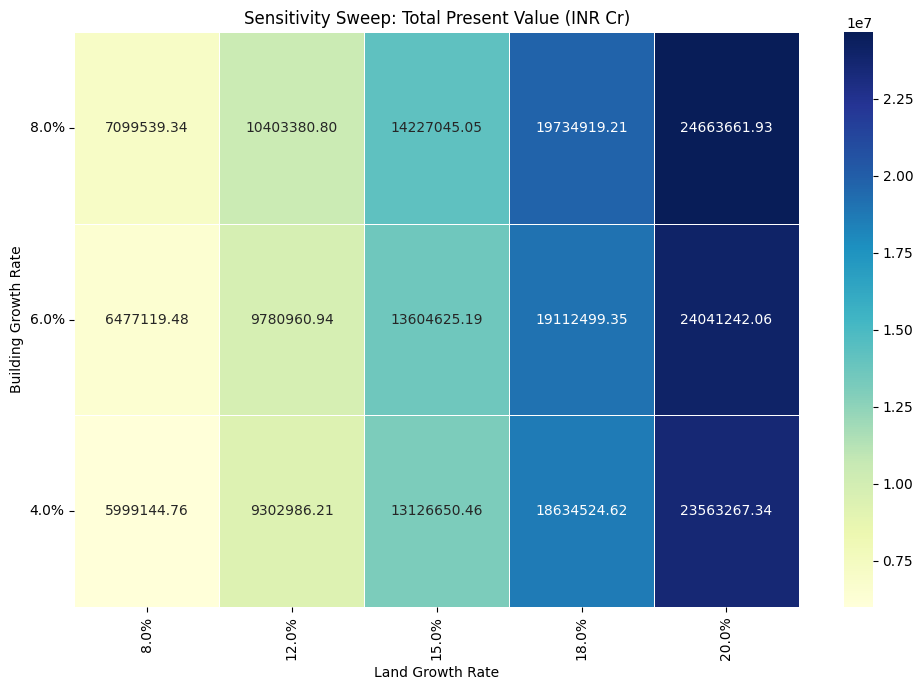

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sweep results (list of dictionaries) into a pandas DataFrame
sweep_df = pd.DataFrame(sweep)

# Pivot the DataFrame to create a matrix suitable for a heatmap
# Index will be building_rate, columns will be land_rate, and values will be total
heatmap_data = sweep_df.pivot(index="build_rate", columns="land_rate", values="total")

# Sort the index and columns to ensure the heatmap is ordered correctly
heatmap_data = heatmap_data.sort_index(ascending=False).sort_index(axis=1)

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.xlabel("Land Growth Rate")
plt.ylabel("Building Growth Rate")
plt.title("Sensitivity Sweep: Total Present Value (INR Cr)")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Adjust the labels to show percentages
plt.gca().set_yticklabels([f'{x:.1%}' for x in heatmap_data.index])
plt.gca().set_xticklabels([f'{x:.1%}' for x in heatmap_data.columns])


plt.tight_layout()
plt.show()

Okay, here is a summary of the key findings from the calculations and visualizations:

**Present Value Calculations:**

*   The "CPI then Property Rates" scenario consistently results in a significantly higher present value for both Item 1 and Item 2 compared to the "CPI-only" scenario, indicating that property-specific appreciation rates have a substantial impact over the long term.
*   For Item 1, the land component contributes much more significantly to the present value appreciation in the "CPI then Property Rates" scenario than the building component.

**Sensitivity Sweep Analysis (for Item 1 combined):**

*   The heatmap clearly shows a strong positive correlation between both land and building growth rates and the final total present value. Higher rates lead to substantially higher present values.
*   The total value is more sensitive to changes in the **land growth rate** than the building growth rate within the tested ranges.
*   The wide range of total present values observed in the sensitivity sweep emphasizes the importance of selecting realistic and well-supported growth rates for accurate projections.

**Overall Interpretation:**

The analysis confirms that property values, particularly land, can appreciate significantly beyond general inflation. The sensitivity sweep helps in understanding the potential range of present values based on different market assumptions and highlights the greater impact of the land growth rate on the final valuation.

Analyze the Implied CAGRs: Review the implied Compound Annual Growth Rates printed in the output of cell LEra7Wbpdte6 to understand the growth rates needed to reach your market benchmarks. Generate the PDF report: Run cell Kj_5tF_bhFgC to create a PDF report summarizing the sensitivity analysis.
Okay, let's analyze the Implied CAGRs from the output of cell LEra7Wbpdte6.

The output shows the Compound Annual Growth Rate (CAGR) required from the 1999 baseline to the target market benchmarks in 2025 over a period of 26 years.

Here's what the Implied CAGRs tell us:

item1_land_market: CAGR = 18.36% p.a.
item1_build_market: CAGR = 18.19% p.a.
item1_total_market: CAGR = 18.30% p.a.
item2_land_market: CAGR = 20.41% p.a.
These percentages represent the constant annual growth rate needed for the 1999 values of each component (or the total for item1) to reach the specified market benchmark values by 2025.

Interpretation:

The implied CAGRs are quite high, ranging from around 18% to over 20%.
For Item 1, the required CAGR for the land and building components are very similar to the overall total.
Item 2 (land) requires a slightly higher CAGR (20.41%) to reach its market benchmark compared to Item 1 land (18.36%). This suggests that the market benchmark for Item 2 is relatively higher compared to its 1999 baseline value than for Item 1 land.
Comparing these implied CAGRs to the growth rates used in your "CPI then Property Rates" scenario (where you currently have land at 15% and building at 7% annually from 2011 onwards) and the sensitivity sweep (which tested rates up to 22% for land and 8% for building) is important. The implied CAGRs suggest that achieving the target market values would require annual growth rates in the range of 18-20% over the entire period from 1999 to 2025.